# Import Libraries

In [47]:
# Importing essential libraries for data handling and analysis
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical operations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Suppress warnings for cleaner notebook presentation
import warnings
warnings.filterwarnings('ignore')

In [48]:
#Set option to display all columns
pd.set_option('display.max_columns', None)

# **Step 1: Exploratory Data Analysis (EDA) and Preprocessing**

- Load the dataset, handle missing values, and perform EDA.<br>

In [49]:
# Load dataset
data = pd.read_excel('Lagos_weather_data_final - Copy.xlsx')
data.head(2)

,name,Datetime,tempmax,tempmin,Temperature,feelslikemax,feelslikemin,feelslike,dew,Humidity,Precipitation,Precipitation_Probability,Precipation_Cover,Rain_Occurence,Wind_Gust,Wind_Speed,Wind_Direction,Sea_Level_Pressure,Cloud_Cover,Visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,Moon_Phase,Conditions,Flood_Occurrence,Description,icon,stations,windspeedmax,windspeedmin
0,Lagos,2004-05-13,31.7,28.2,30.0,38.9,32.6,35.8,24.9,74.7,0.0,0.0,0.0,NaN,NaN,20.5,128.2,NaN,90.0,11.0,NaN,NaN,NaN,NaN,2004-05-13T06:30:34,2004-05-13T18:55:02,0.80,Partially cloudy,NaN,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
1,Lagos,2004-05-14,26.6,25.7,26.3,26.6,25.7,26.3,25.9,97.5,0.0,0.0,0.0,NaN,NaN,20.5,280.4,NaN,87.5,8.5,NaN,NaN,NaN,NaN,2004-05-14T06:30:27,2004-05-14T18:55:10,0.83,Partially cloudy,NaN,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN


In [50]:
data.columns

Index(['name', 'Datetime', 'tempmax', 'tempmin', 'Temperature', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'Humidity', 'Precipitation',
       'Precipitation_Probability', 'Precipation_Cover', 'Rain_Occurence',
       'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 'Sea_Level_Pressure',
       'Cloud_Cover', 'Visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'Moon_Phase', 'Conditions',
       'Flood_Occurrence', 'Description', 'icon', 'stations', 'windspeedmax',
       'windspeedmin'],
      dtype='object')

In [51]:
data.shape

(7357, 34)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7357 entries, 0 to 7356
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       7357 non-null   object        
 1   Datetime                   7357 non-null   datetime64[ns]
 2   tempmax                    7021 non-null   float64       
 3   tempmin                    7021 non-null   float64       
 4   Temperature                7021 non-null   float64       
 5   feelslikemax               7021 non-null   float64       
 6   feelslikemin               7021 non-null   float64       
 7   feelslike                  7021 non-null   float64       
 8   dew                        7021 non-null   float64       
 9   Humidity                   7021 non-null   float64       
 10  Precipitation              7021 non-null   float64       
 11  Precipitation_Probability  7021 non-null   float64       
 12  Precip

In [53]:
data.isnull().sum()

name                            0
Datetime                        0
tempmax                       336
tempmin                       336
Temperature                   336
feelslikemax                  336
feelslikemin                  336
feelslike                     336
dew                           336
Humidity                      336
Precipitation                 336
Precipitation_Probability     336
Precipation_Cover               0
Rain_Occurence               4017
Wind_Gust                    1937
Wind_Speed                    366
Wind_Direction                714
Sea_Level_Pressure            521
Cloud_Cover                   336
Visibility                    537
solarradiation               2425
solarenergy                  2425
uvindex                      2425
severerisk                   6451
sunrise                       366
sunset                        366
Moon_Phase                    366
Conditions                    692
Flood_Occurrence             3876
Description   

In [54]:
#checking unique values in different variables
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
name,2
Datetime,7357
tempmax,136
tempmin,138
Temperature,106
feelslikemax,231
feelslikemin,195
feelslike,191
dew,162
Humidity,465


In [55]:
# Checking the value counts of each feature
for col in data:
  print(data[col].value_counts())
  print("-" * 50)

Lagos    6627
lagos     730
Name: name, dtype: int64
--------------------------------------------------
2004-05-13    1
2017-10-26    1
2017-10-24    1
2017-10-23    1
2017-10-22    1
             ..
2011-01-26    1
2011-01-25    1
2011-01-24    1
2011-01-23    1
2024-07-03    1
Name: Datetime, Length: 7357, dtype: int64
--------------------------------------------------
34.0    502
33.0    492
32.0    416
31.0    379
30.0    377
       ... 
21.4      1
24.9      1
24.6      1
22.9      1
36.8      1
Name: tempmax, Length: 136, dtype: int64
--------------------------------------------------
24.0    868
25.0    656
23.0    552
24.1    354
26.0    316
       ... 
31.4      1
31.9      1
33.4      1
30.2      1
29.0      1
Name: tempmin, Length: 138, dtype: int64
--------------------------------------------------
26.4    181
27.3    161
26.0    158
26.5    157
27.9    155
       ... 
23.1      1
23.2      1
23.3      1
34.3      1
23.5      1
Name: Temperature, Length: 106, dtype: int64
-

In [56]:
# Check the column names of both dataframes
data.columns

Index(['name', 'Datetime', 'tempmax', 'tempmin', 'Temperature', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'Humidity', 'Precipitation',
       'Precipitation_Probability', 'Precipation_Cover', 'Rain_Occurence',
       'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 'Sea_Level_Pressure',
       'Cloud_Cover', 'Visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'Moon_Phase', 'Conditions',
       'Flood_Occurrence', 'Description', 'icon', 'stations', 'windspeedmax',
       'windspeedmin'],
      dtype='object')

In [57]:
data.columns = ['name', 'Datetime', 'tempmax', 'tempmin', 'Temperature', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'Humidity', 'Precipitation',
       'Precipitation_Probability', 'Precipation_Cover', 'Rain_Occurence',
       'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 'Sea_Level_Pressure',
       'Cloud_Cover', 'Visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'Moon_Phase', 'Conditions',
       'Flood_Occurrence', 'Description', 'icon', 'stations', 'windspeedmax',
       'windspeedmin']

In [58]:
data.columns

Index(['name', 'Datetime', 'tempmax', 'tempmin', 'Temperature', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'Humidity', 'Precipitation',
       'Precipitation_Probability', 'Precipation_Cover', 'Rain_Occurence',
       'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 'Sea_Level_Pressure',
       'Cloud_Cover', 'Visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'Moon_Phase', 'Conditions',
       'Flood_Occurrence', 'Description', 'icon', 'stations', 'windspeedmax',
       'windspeedmin'],
      dtype='object')

In [59]:
weather = data.filter(['Datetime','Temperature', 'Precipitation','Precipitation_Probability','Precipation_Cover', 'Rain_Occurence',
       'Wind_Gust', 'Wind_Speed', 'Wind_Direction','Humidity', 'Sea_Level_Pressure','Moon_Phase', 'Flood_Occurrence'], axis = 1)
weather.head(2)

,Datetime,Temperature,Precipitation,Precipitation_Probability,Precipation_Cover,Rain_Occurence,Wind_Gust,Wind_Speed,Wind_Direction,Humidity,Sea_Level_Pressure,Moon_Phase,Flood_Occurrence
0,2004-05-13,30.0,0.0,0.0,0.0,NaN,NaN,20.5,128.2,74.7,NaN,0.80,NaN
1,2004-05-14,26.3,0.0,0.0,0.0,NaN,NaN,20.5,280.4,97.5,NaN,0.83,NaN


### Data Cleaning

In [60]:
# Replace 'rain' with 1 and all other values (including NaNs) with 0
weather['Rain_Occurence'] = weather['Rain_Occurence'].replace('rain', 1)
weather['Rain_Occurence'] = weather['Rain_Occurence'].fillna(0)
weather['Rain_Occurence'] = weather['Rain_Occurence'].astype(int)

# Replace missing values in 'Flood_Occurrence' with 0 (no flood)
weather['Flood_Occurrence'] = weather['Flood_Occurrence'].fillna(0)
weather['Flood_Occurrence'] = weather['Flood_Occurrence'].astype(int)

# Check the changes
print(weather[['Rain_Occurence', 'Flood_Occurrence']].head())



   Rain_Occurence  Flood_Occurrence
0               0                 0
1               0                 0
2               0                 0
3               0                 0
4               0                 0


In [61]:
median = weather.Wind_Gust.median()
weather.Wind_Gust.fillna(median, inplace = True)

In [62]:
median = weather.Sea_Level_Pressure.median()
median

1011.9

In [63]:
weather.Sea_Level_Pressure.fillna(median, inplace=True)


In [64]:
# Fill empty cells of numerical variables with 0
numerical_columns = weather.select_dtypes(include=['number']).columns
weather[numerical_columns] = weather[numerical_columns].fillna(0)

In [65]:
weather.head(3)

,Datetime,Temperature,Precipitation,Precipitation_Probability,Precipation_Cover,Rain_Occurence,Wind_Gust,Wind_Speed,Wind_Direction,Humidity,Sea_Level_Pressure,Moon_Phase,Flood_Occurrence
0,2004-05-13,30.0,0.0,0.0,0.0,0,28.1,20.5,128.2,74.7,1011.9,0.80,0
1,2004-05-14,26.3,0.0,0.0,0.0,0,28.1,20.5,280.4,97.5,1011.9,0.83,0
2,2004-05-15,25.1,0.0,0.0,0.0,0,28.1,16.6,180.0,100.0,1011.9,0.87,0


In [67]:
weather.isnull().sum()

Datetime                     0
Temperature                  0
Precipitation                0
Precipitation_Probability    0
Precipation_Cover            0
Rain_Occurence               0
Wind_Gust                    0
Wind_Speed                   0
Wind_Direction               0
Humidity                     0
Sea_Level_Pressure           0
Moon_Phase                   0
Flood_Occurrence             0
dtype: int64

In [68]:
weather.describe()

,Temperature,Precipitation,Precipitation_Probability,Precipation_Cover,Rain_Occurence,Wind_Gust,Wind_Speed,Wind_Direction,Humidity,Sea_Level_Pressure,Moon_Phase,Flood_Occurrence
count,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000,7357.000000
mean,26.158407,4.944502,42.231888,5.354873,0.453989,29.001658,21.233818,197.798967,78.954832,1012.032486,0.459155,0.006117
std,5.928894,18.254626,49.396236,13.244749,0.497912,9.295310,12.964308,79.277413,18.663443,1.747282,0.300545,0.077975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1005.900000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000,0.000000,25.600000,15.100000,198.900000,79.600000,1010.800000,0.190000,0.000000
50%,27.300000,0.000000,0.000000,0.000000,0.000000,28.100000,20.500000,221.600000,83.400000,1011.900000,0.460000,0.000000
75%,28.500000,1.700000,100.000000,4.170000,1.000000,31.700000,25.900000,241.000000,86.600000,1013.200000,0.720000,0.000000
max,34.600000,299.000000,100.000000,100.000000,1.000000,137.200000,277.900000,360.000000,100.000000,1017.300000,0.980000,1.000000


Observations:

Temperature:

The average temperature (mean) is 27.4°C with a standard deviation of 1.6°C.
Minimum and maximum temperatures range from 21.4°C to 34.6°C.
While temperature can influence evaporation rates, its impact on flooding might be less significant compared to precipitation.
Humidity:

The average humidity is 82.7% with a standard deviation of 7.2%.
High humidity can contribute to heavier rainfall, potentially increasing flood risk.
Precipitation:

The average precipitation is a very low value (5.18 mm), which might be due to missing data or a specific time period with minimal rainfall.
This metric is crucial for flood prediction and requires further investigation.
Precipitation Probability:

The average precipitation probability is 44.3%, indicating a moderate chance of rain on any given day.
This can be helpful when combined with actual precipitation data to assess potential flood risk.
Precipitation Cover:

The average precipitation cover (percentage of area experiencing rain) is 5.6%. This aligns with the low average precipitation value.
This metric can be informative if analyzed alongside precipitation amount to understand the distribution of rainfall events.
Rain Occurrence:

The average rain occurrence is a very low value (0.48), likely due to missing data or a period with minimal rainfall.
Similar to precipitation, this data needs verification or context.
Flood Occurrence:

The average flood occurrence is practically zero (0.01), suggesting the data might not capture historical floods or the timeframe analyzed had minimal flooding events.
Historical flood data is essential for identifying patterns and predicting future risk.
Wind:

The average wind gust is 22.6 m/s (around 81 km/h) with a standard deviation of 15.5 m/s.
The average wind speed is 2.2 m/s (around 8 km/h) with a standard deviation of 2.4 m/s.
Strong wind gusts can influence storm surges and coastal flooding, but wind speed seems relatively low on average.
Sea Level Pressure:

The average sea level pressure is 1012 hPa with a standard deviation of 16.2 hPa.
Significant deviations from this average could be relevant for coastal flooding, but further analysis is needed.
Cloud Cover and Moon Phase:

The average cloud cover is 53.8%.
Cloud cover can impact rainfall patterns, but its role in flood prediction requires further investigation in conjunction with other factors.
Moon phase information (average value not informative here) might not be directly relevant for flood prediction.
Limitations:

The very low values for precipitation, rain occurrence, and flood occurrence suggest potential missing data or an unrepresentative timeframe.
Without complete and accurate historical flood data, it's difficult to identify patterns and make strong predictions about future flood risk.

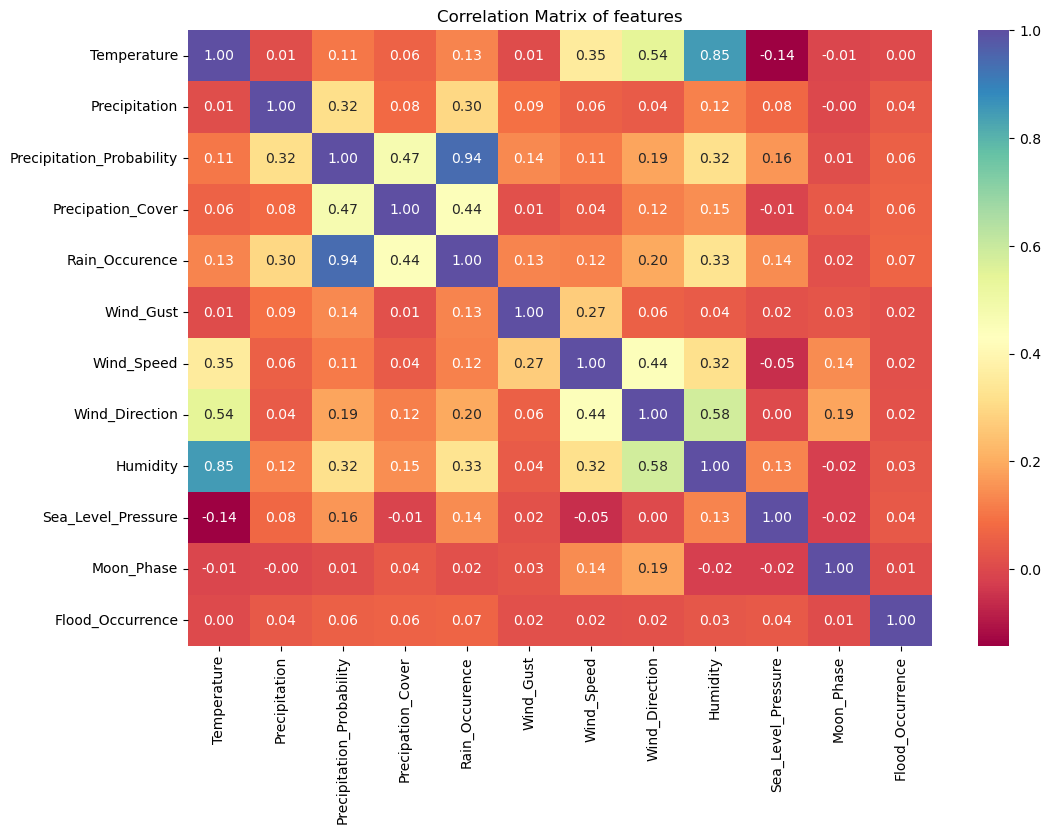

In [69]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(weather.corr(), annot=True, fmt=".2f", cmap='Spectral')
plt.title("Correlation Matrix of features")
plt.show()

### Feature Engineering

In [71]:
# Convert the 'datetime' column to datetime format
weather['Datetime'] = pd.to_datetime(weather['Datetime'], errors='coerce')

# Extract year, month, and day from 'datetime'
weather['Year'] = weather['Datetime'].dt.year
weather['Month'] = weather['Datetime'].dt.month
weather['Day'] = weather['Datetime'].dt.day

In [72]:
weather.head(3)

,Datetime,Temperature,Precipitation,Precipitation_Probability,Precipation_Cover,Rain_Occurence,Wind_Gust,Wind_Speed,Wind_Direction,Humidity,Sea_Level_Pressure,Moon_Phase,Flood_Occurrence,Year,Month,Day
0,2004-05-13,30.0,0.0,0.0,0.0,0,28.1,20.5,128.2,74.7,1011.9,0.80,0,2004,5,13
1,2004-05-14,26.3,0.0,0.0,0.0,0,28.1,20.5,280.4,97.5,1011.9,0.83,0,2004,5,14
2,2004-05-15,25.1,0.0,0.0,0.0,0,28.1,16.6,180.0,100.0,1011.9,0.87,0,2004,5,15


### Exploratory Data Analysis

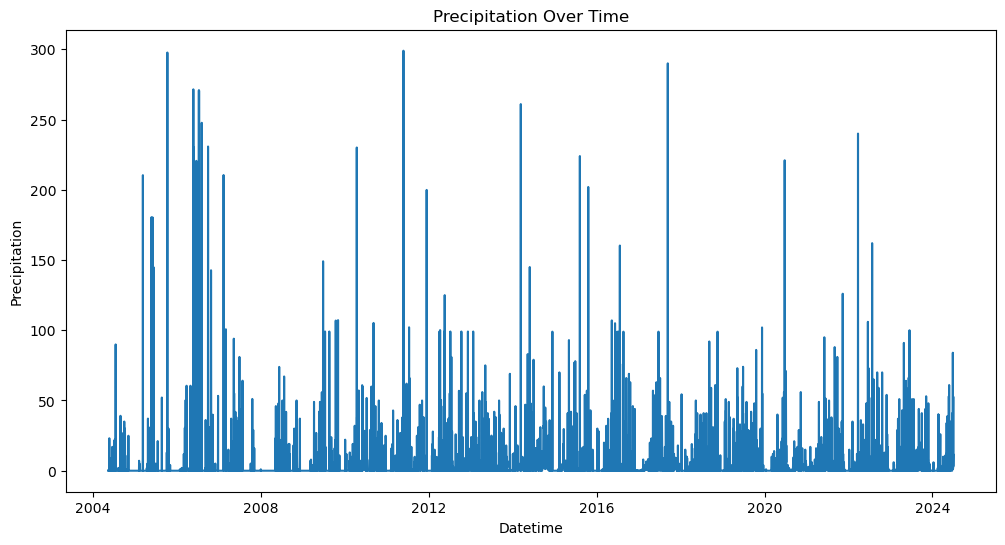

In [73]:
# Plot precipitation over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=weather, x='Datetime', y='Precipitation')
plt.title('Precipitation Over Time')
plt.show()

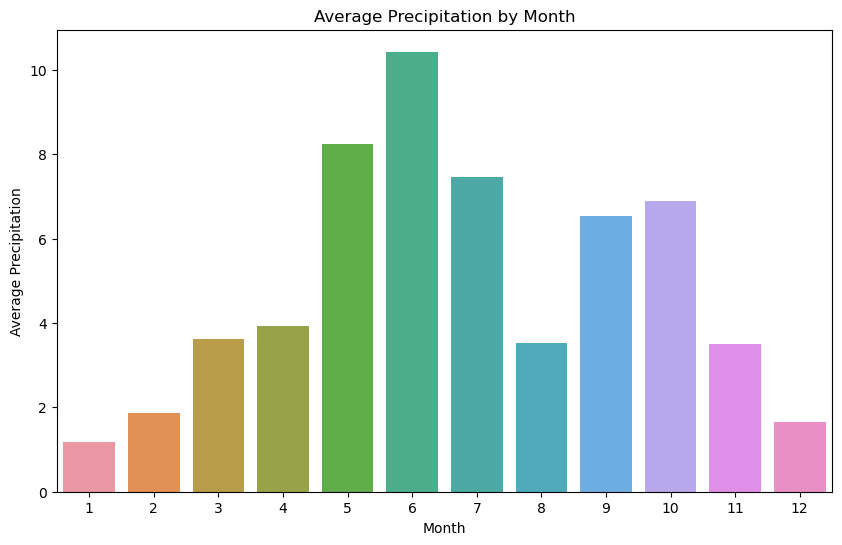

In [74]:
# 3. Average precipitation
average_precipitation = weather.groupby('Month')['Precipitation'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_precipitation, x='Month', y='Precipitation')
plt.title('Average Precipitation by Month')
plt.xlabel('Month')
plt.ylabel('Average Precipitation')
plt.show()

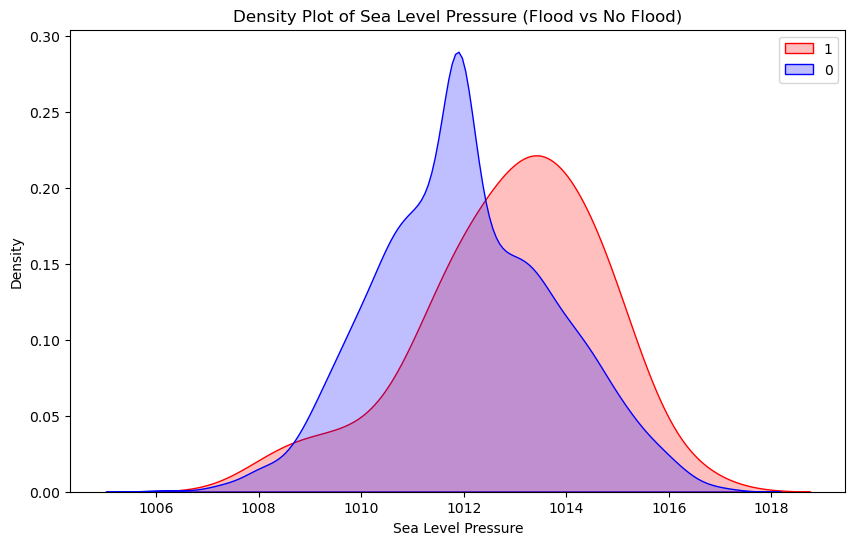

In [75]:
# Density Plots
plt.figure(figsize=(10, 6))
sns.kdeplot(data=weather[weather['Flood_Occurrence'] == 1]['Sea_Level_Pressure'], label=1, shade=True, color='r')
sns.kdeplot(data=weather[weather['Flood_Occurrence'] == 0]['Sea_Level_Pressure'], label=0, shade=True, color='b')
plt.title('Density Plot of Sea Level Pressure (Flood vs No Flood)')
plt.xlabel('Sea Level Pressure')
plt.ylabel('Density')
plt.legend()
plt.show()

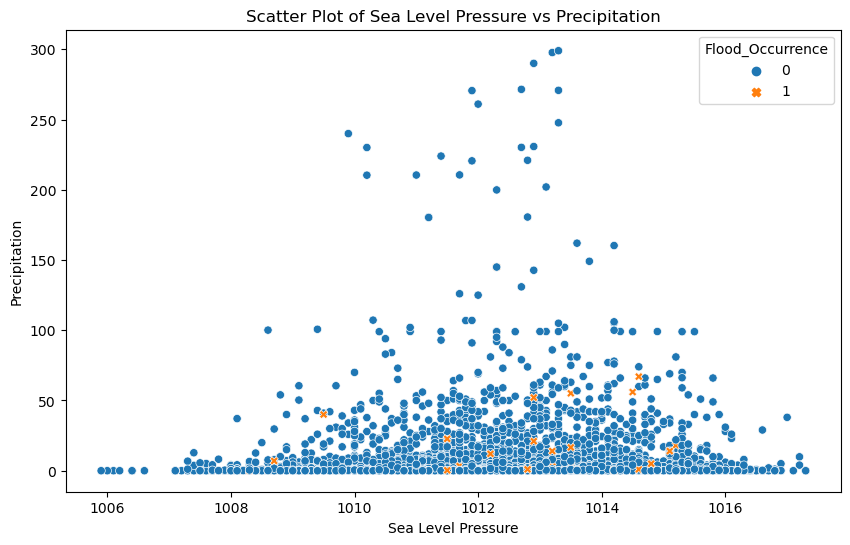

In [76]:
# Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather, x='Sea_Level_Pressure', y='Precipitation', hue='Flood_Occurrence', style='Flood_Occurrence')
plt.title('Scatter Plot of Sea Level Pressure vs Precipitation')
plt.xlabel('Sea Level Pressure')
plt.ylabel('Precipitation')
plt.show()

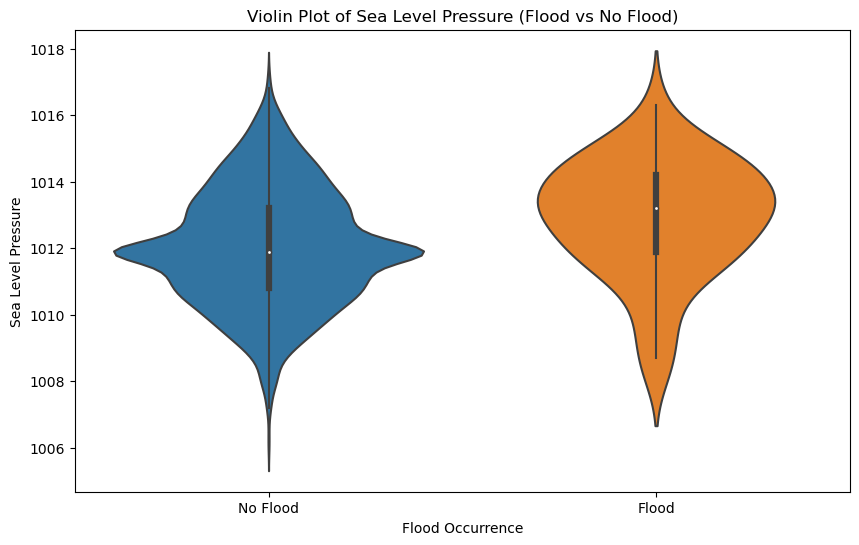

In [77]:
# Violin Plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=weather, x='Flood_Occurrence', y='Sea_Level_Pressure')
plt.title('Violin Plot of Sea Level Pressure (Flood vs No Flood)')
plt.xlabel('Flood Occurrence')
plt.ylabel('Sea Level Pressure')
plt.xticks([0, 1], ['No Flood', 'Flood'])
plt.show()

The sea level pressure on flood days tends to be more consistent compared to non-flood days, as indicated by the narrower distribution in the flood violin plot.
This suggests that certain ranges of sea level pressure are more strongly associated with flood occurrences.

In [78]:
flood = weather[weather['Flood_Occurrence'] == 1]
flood

,Datetime,Temperature,Precipitation,Precipitation_Probability,Precipation_Cover,Rain_Occurence,Wind_Gust,Wind_Speed,Wind_Direction,Humidity,Sea_Level_Pressure,Moon_Phase,Flood_Occurrence,Year,Month,Day
92,2004-08-13,25.4,0.0,0.0,0.00,0,28.1,33.5,232.3,83.6,1014.9,0.92,1,2004,8,13
394,2005-06-11,23.8,145.0,100.0,8.33,1,28.1,18.4,279.5,95.1,1012.3,0.15,1,2005,6,11
395,2005-06-12,23.6,34.0,100.0,4.17,1,28.1,22.3,340.0,98.1,1011.9,0.18,1,2005,6,12
451,2005-08-07,25.1,0.0,0.0,0.00,0,28.1,29.5,247.3,83.5,1014.3,0.08,1,2005,8,7
2230,2010-06-21,27.3,17.1,100.0,100.00,1,28.1,18.7,224.1,85.9,1011.9,0.32,1,2010,6,21
2614,2011-07-10,24.2,1.0,100.0,4.17,1,25.9,29.5,229.9,95.0,1014.2,0.33,1,2011,7,10
2972,2012-07-02,23.8,55.1,100.0,8.33,1,55.4,0.0,0.0,96.1,1013.5,0.00,1,2012,7,2
3016,2012-08-15,25.2,0.0,0.0,0.00,0,31.7,0.0,0.0,78.8,1016.3,0.00,1,2012,8,15
3350,2013-07-15,25.6,0.1,100.0,4.17,1,24.1,14.8,230.2,91.6,1015.0,0.25,1,2013,7,15
4804,2017-07-08,24.6,18.1,100.0,8.33,1,25.9,14.8,247.9,95.5,1015.2,0.48,1,2017,7,8


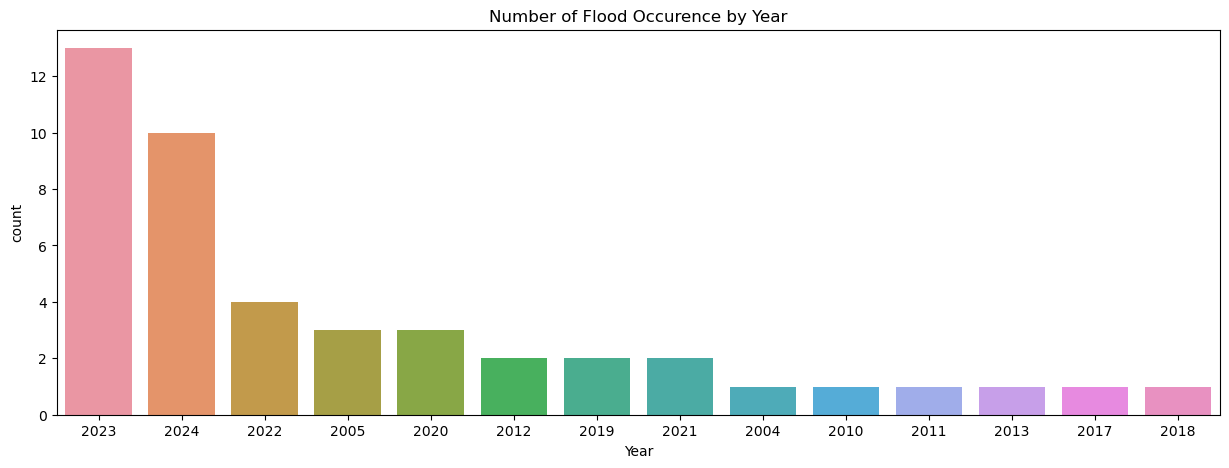

In [79]:
# show the trend of flood occurence by year
plt.figure(figsize=(15,5))
plt.title('Number of Flood Occurence by Year')
sns.countplot(x='Year', data=flood, order=flood['Year'].value_counts().index)
plt.show()

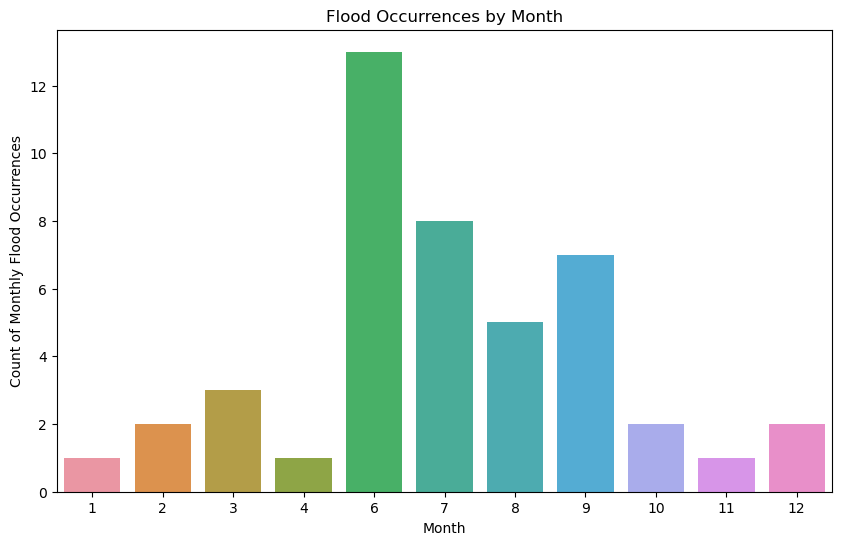

In [80]:
# 1. Visualization of months that floods are likely to occur
plt.figure(figsize=(10, 6))
sns.countplot(data=flood[flood['Flood_Occurrence'] == 1], x='Month')
plt.title('Flood Occurrences by Month')
plt.xlabel('Month')
plt.ylabel('Count of Monthly Flood Occurrences')
plt.show()

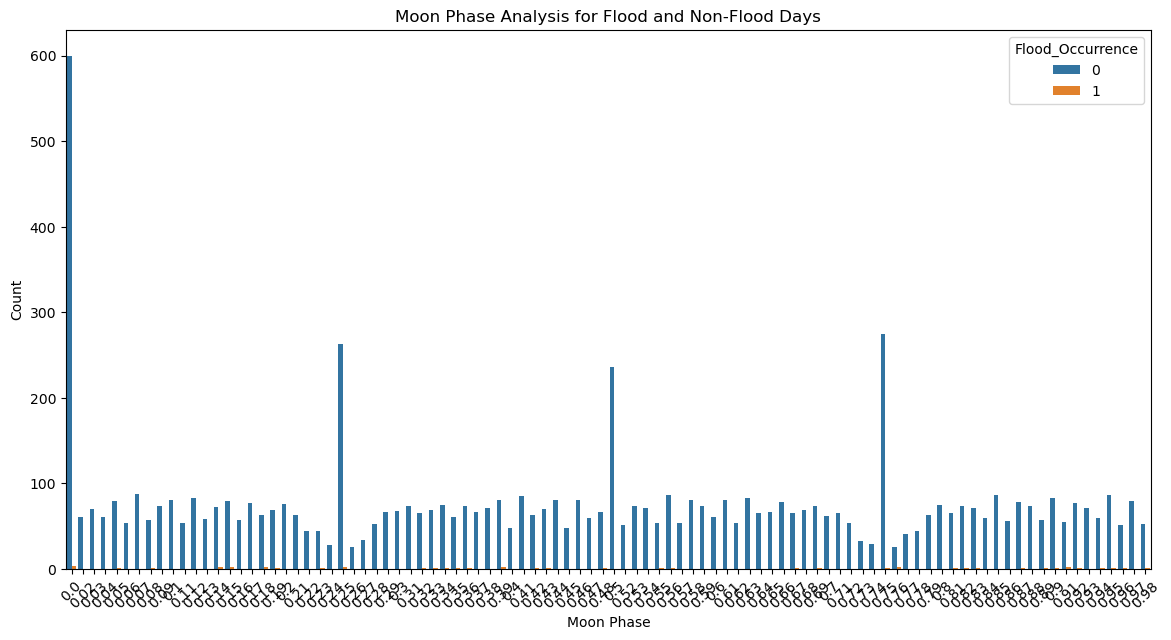

In [81]:
# 4. Visualizations for moon phase (flood vs no flood)
plt.figure(figsize=(14, 7))
sns.countplot(data=weather, x='Moon_Phase', hue='Flood_Occurrence')
plt.title('Moon Phase Analysis for Flood and Non-Flood Days')
plt.xlabel('Moon Phase')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

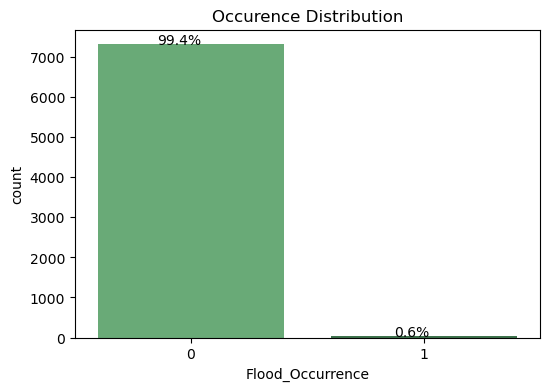

In [82]:
# Class distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Flood_Occurrence', data=weather, palette = 'Greens_d')
plt.title('Occurence Distribution')

# Calculate percentages and annotate
total = len(weather['Flood_Occurrence'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    
# Saving the plot
plt.savefig('flood_occurence_distribution.png')
plt.show()

In [83]:
# Count the frequency of each class in the 'target' column
weather["Flood_Occurrence"].value_counts()

0    7312
1      45
Name: Flood_Occurrence, dtype: int64

Data is not balanced . This may cause the model not to perform well due to the influence of the more frequency class

#### Balancing the data

- Addressing class imbalance is crucial for developing unbiased and correct machine learning model prediction, especially  where both sensitivity and specificity are important.

-  We employed Simple Random Oversampling, a technique that involves augmenting the minority class by duplicating its samples).

In [84]:
# Check the current distribution of the target classes
print("Original distribution:\n", weather["Flood_Occurrence"].value_counts())

Original distribution:
 0    7312
1      45
Name: Flood_Occurrence, dtype: int64


In [85]:
def balance_classes(df, target_column):
    """
    This function balances the classes in the specified target column by oversampling the minority class.
    
    Parameters:
    df (pd.DataFrame): The original dataframe.
    target_column (str): The name of the target column to balance.
    
    Returns:
    pd.DataFrame: The dataframe with balanced classes.
    """
    # Count the frequency of each class
    class_counts = df[target_column].value_counts()
    
    # Identify the majority and minority classes
    majority_class = class_counts.idxmax()
    minority_class = class_counts.idxmin()
    
    # Calculate the number of samples to match the majority class
    n_samples_to_add = class_counts[majority_class] - class_counts[minority_class]
    
    # Oversample the minority class
    minority_class_samples = df[df[target_column] == minority_class]
    oversampled_minority_class_samples = minority_class_samples.sample(n_samples_to_add, replace=True, random_state=42)
    
    # Append the oversampled minority class samples to the original dataframe
    balanced_df = pd.concat([df, oversampled_minority_class_samples], ignore_index=True)
    
    # Shuffle the dataframe
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    return balanced_df

# Apply the balancing function to the weather dataframe
weather_balanced = balance_classes(weather, 'Flood_Occurrence')

In [97]:

# Sanity check to confirm the new distribution
print("Balanced distribution:\n", weather_balanced["Flood_Occurrence"].value_counts())

Balanced distribution:
 1    7312
0    7312
Name: Flood_Occurrence, dtype: int64


## Data Preprocessing

### **Splitting the Data**

- Dataset split into training, validation, and testing sets in an 80:10:10 ratio to avoid overfitting, ensure model generalizability, and validate the model's performance on unseen data 

### Normalizing the features

In [98]:
# Define the columns to keep for features
columns_to_keep = ['Temperature', 'Precipitation', 'Precipitation_Probability', 'Precipation_Cover', 
                   'Rain_Occurence', 'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 'Humidity', 
                   'Sea_Level_Pressure', 'Moon_Phase']

# Extract features and target
x = weather_balanced[columns_to_keep]
y = weather_balanced['Flood_Occurrence']

In [99]:
# Check the shape of X and y
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (14624, 11)
Shape of y: (14624,)


In [100]:
# Split the data into training (80%) and temporary (20%) sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Split the temporary set into testing (50%) and validation (50%) sets
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [101]:
# Standardize the features
scaler = StandardScaler()
x_train_res_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)

Logistic Regression - Training Accuracy: 0.7135
Logistic Regression - Validation Accuracy: 0.7116
Logistic Regression - Test Accuracy: 0.7271
Test Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       731
           1       0.72      0.75      0.73       731

    accuracy                           0.73      1462
   macro avg       0.73      0.73      0.73      1462
weighted avg       0.73      0.73      0.73      1462



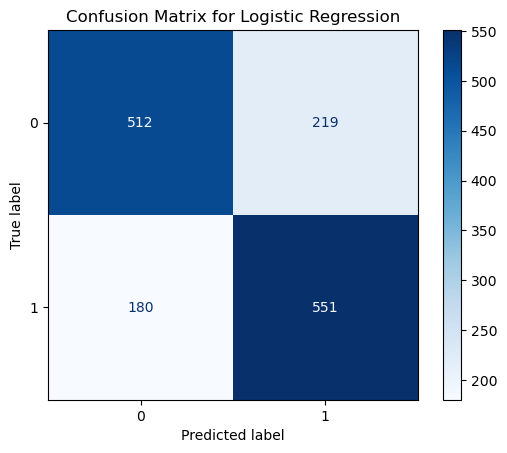

In [102]:
# Train a Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1500, random_state=0, class_weight='balanced', solver='liblinear')
logistic_model.fit(x_train_res_scaled, y_train)

# Evaluate on the training set
y_train_pred = logistic_model.predict(x_train_res_scaled)
train_accuracy = logistic_model.score(x_train_res_scaled, y_train)
print(f"Logistic Regression - Training Accuracy: {train_accuracy:.4f}")


# Evaluate on the validation set
y_val_pred = logistic_model.predict(x_val_scaled)
val_accuracy = logistic_model.score(x_val_scaled, y_val)
print(f"Logistic Regression - Validation Accuracy: {val_accuracy:.4f}")


# Evaluate on the test set
y_test_pred = logistic_model.predict(x_test_scaled)
test_accuracy = logistic_model.score(x_test_scaled, y_test)
print(f"Logistic Regression - Test Accuracy: {test_accuracy:.4f}")
print("Test Classification Report for Logistic Regression:\n")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

Random Forest - Training Accuracy: 0.9880
Random Forest - Validation Accuracy: 0.9829
Random Forest - Test Accuracy: 0.9884
Test Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       731
           1       0.98      1.00      0.99       731

    accuracy                           0.99      1462
   macro avg       0.99      0.99      0.99      1462
weighted avg       0.99      0.99      0.99      1462



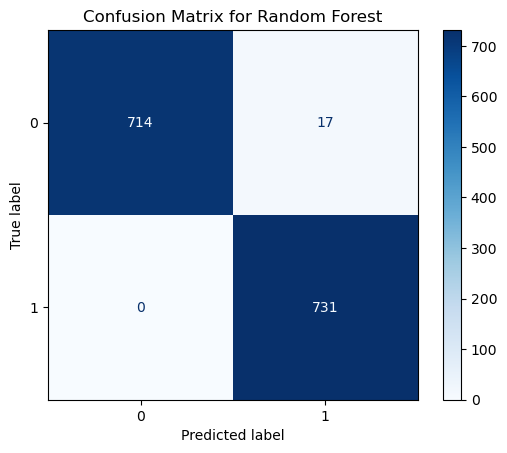

In [103]:
# Train a Random Forest Model
rf_model = RandomForestClassifier(n_estimators=500, random_state=0, max_depth=10)
rf_model.fit(x_train_res_scaled, y_train)

# Evaluate on the training set
y_train_pred = rf_model.predict(x_train_res_scaled)
train_accuracy = rf_model.score(x_train_res_scaled, y_train)
print(f"Random Forest - Training Accuracy: {train_accuracy:.4f}")


# Evaluate on the validation set
y_val_pred = rf_model.predict(x_val_scaled)
val_accuracy = rf_model.score(x_val_scaled, y_val)
print(f"Random Forest - Validation Accuracy: {val_accuracy:.4f}")


# Evaluate on the test set
y_test_pred = rf_model.predict(x_test_scaled)
test_accuracy = rf_model.score(x_test_scaled, y_test)
print(f"Random Forest - Test Accuracy: {test_accuracy:.4f}")
print("Test Classification Report for Random Forest:\n")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.show()


XGBoost - Training Accuracy: 1.0000
XGBoost - Validation Accuracy: 0.9993
XGBoost - Test Accuracy: 0.9993
Test Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       731
           1       1.00      1.00      1.00       731

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462



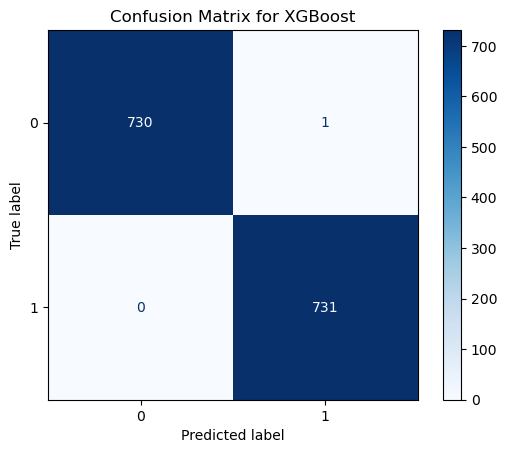

In [104]:
# Train an XGBoost Model
xgb_model = XGBClassifier(n_estimators=500, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train_res_scaled, y_train)

# Evaluate on the training set
y_train_pred = xgb_model.predict(x_train_res_scaled)
train_accuracy = xgb_model.score(x_train_res_scaled, y_train)
print(f"XGBoost - Training Accuracy: {train_accuracy:.4f}")


# Evaluate on the validation set
y_val_pred = xgb_model.predict(x_val_scaled)
val_accuracy = xgb_model.score(x_val_scaled, y_val)
print(f"XGBoost - Validation Accuracy: {val_accuracy:.4f}")


# Evaluate on the test set
y_test_pred = xgb_model.predict(x_test_scaled)
test_accuracy = xgb_model.score(x_test_scaled, y_test)
print(f"XGBoost - Test Accuracy: {test_accuracy:.4f}")
print("Test Classification Report for XGBoost:\n")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for XGBoost")
plt.show()


Stacking - Training Accuracy: 1.0000
Stacking - Validation Accuracy: 1.0000
Stacking - Test Accuracy: 1.0000
Test Classification Report for Stacking:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       731
           1       1.00      1.00      1.00       731

    accuracy                           1.00      1462
   macro avg       1.00      1.00      1.00      1462
weighted avg       1.00      1.00      1.00      1462



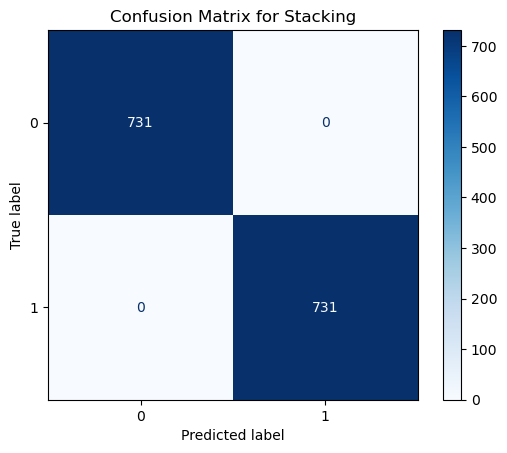

In [105]:
# Train a Stacking Model
stacking_model = StackingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier())])
stacking_model.fit(x_train_res_scaled, y_train)

# Evaluate on the training set
y_train_pred = stacking_model.predict(x_train_res_scaled)
train_accuracy = stacking_model.score(x_train_res_scaled, y_train)
print(f"Stacking - Training Accuracy: {train_accuracy:.4f}")


# Evaluate on the validation set
y_val_pred = stacking_model.predict(x_val_scaled)
val_accuracy = stacking_model.score(x_val_scaled, y_val)
print(f"Stacking - Validation Accuracy: {val_accuracy:.4f}")

# Evaluate on the test set
y_test_pred = stacking_model.predict(x_test_scaled)
test_accuracy = stacking_model.score(x_test_scaled, y_test)
print(f"Stacking - Test Accuracy: {test_accuracy:.4f}")
print("Test Classification Report for Stacking:\n")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=stacking_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Stacking")
plt.show()


# Predicting the next flood occurrence

In [106]:
future_weather = pd.read_csv('lagos_flood_predict_ 2024-07-04 to 2025-12-31.csv')
future_weather.head(1)

,name,Datetime,tempmax,tempmin,Temperature,feelslikemax,feelslikemin,feelslike,dew,Humidity,Precipitation,Precipitation_Probability,Precipation_Cover,Rain_Occurence,Wind_Gust,Wind_Speed,Wind_Direction,Sea_Level_Pressure,Cloud_Cover,Visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,Moon_Phase,Conditions,Description,icon,stations
0,lagos,7/4/2024,30.0,24.0,26.8,36.1,24.0,29.4,24.3,86.7,7.4,100.0,58.33,rain,18.6,13.9,229.1,1014.0,42.8,5.2,200.2,17.3,6.0,10.0,2024-07-04T06:36:28,2024-07-04T19:05:34,0.95,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,DNMM


In [108]:
# Replace 'rain' with 1 and all other values (including NaNs) with 0
future_weather['Rain_Occurence'] = future_weather['Rain_Occurence'].replace('rain', 1)
future_weather['Rain_Occurence'] = future_weather['Rain_Occurence'].fillna(0)
future_weather['Rain_Occurence'] = future_weather['Rain_Occurence'].astype(int)

In [109]:
median = future_weather.Wind_Gust.median()
future_weather.Wind_Gust.fillna(median, inplace = True)

In [110]:
median = future_weather.Sea_Level_Pressure.median()
future_weather.Sea_Level_Pressure.fillna(median, inplace=True)

In [111]:
# Fill empty cells of numerical variables with 0
numerical_columns = future_weather.select_dtypes(include=['number']).columns
future_weather[numerical_columns] = future_weather[numerical_columns].fillna(0)

In [112]:
# Define the columns to keep for features
columns_to_keep = ['Temperature', 'Precipitation', 'Precipitation_Probability', 'Precipation_Cover', 
                   'Rain_Occurence', 'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 'Humidity', 
                   'Sea_Level_Pressure', 'Moon_Phase']

In [118]:
# Select only the columns to keep from the future_weather dataframe
future_weather_selected = future_weather[columns_to_keep]
future_weather_selected.head(3)

,Temperature,Precipitation,Precipitation_Probability,Precipation_Cover,Rain_Occurence,Wind_Gust,Wind_Speed,Wind_Direction,Humidity,Sea_Level_Pressure,Moon_Phase
0,26.8,7.4,100.0,58.33,1,18.6,13.9,229.1,86.7,1014.0,0.95
1,27.5,3.8,100.0,45.83,1,15.2,12.8,243.3,83.4,1014.3,0.00
2,26.7,7.0,100.0,75.00,1,19.9,17.0,225.0,81.5,1012.8,0.02


In [114]:
# Scale the features using the same scaler fitted on the training data
future_weather_scaled = scaler.transform(future_weather[columns_to_keep])

In [115]:
# Predict future flood events
future_predictions = stacking_model.predict(future_weather_scaled)

In [117]:
# Add predictions to the future weather data
future_weather['Flood_Prediction'] = future_predictions

# Display the results
print(future_weather[['Datetime', 'Flood_Prediction']])

       Datetime  Flood_Prediction
0      7/4/2024                 0
1      7/5/2024                 0
2      7/6/2024                 0
3      7/7/2024                 0
4      7/8/2024                 0
..          ...               ...
541  12/27/2025                 0
542  12/28/2025                 0
543  12/29/2025                 0
544  12/30/2025                 0
545  12/31/2025                 0

[546 rows x 2 columns]


In [ ]:
flood_pred = future_weather.filter(['Temperature', 'Humidity', 'Precipitation', 'Precipitation_Probability', 'Precipation_Cover', 'Rain_Occurence', 'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 'Sea_Level_Pressure', 'Moon_Phase'])

In [ ]:
# # Ensure the Moon_Phase column is numeric
# future_weather['Moon_Phase'] = pd.to_numeric(future_weather['Moon_Phase'], errors='coerce')

# # Fill any remaining NaN values in features with 0 (if any)
# features = ['Temperature', 'Humidity', 'Precipitation', 'Precipitation_Probability', 'Precipation_Cover', 'Rain_Occurence', 'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 'Sea_Level_Pressure', 'Cloud_Cover', 'Moon_Phase']
# future_weather[features] = future_weather[features].fillna(0)

# Normalize the features using the same scaler used during training
scaler = StandardScaler()
scaler.fit(x)  # Ensure the scaler is fitted on the training data
future_weather_scaled = scaler.transform(future_weather[features])

# Use the trained random forest model to predict future flood occurrences
stacking_model.fit(x_train_sd, y_train)  # Assuming rf_model is your trained model
future_predictions = rf_model.predict(future_weather_scaled)

# Add predictions to the future_weather dataframe
future_weather['Flood_Prediction'] = future_predictions

# Display the predictions
print(future_weather[['Datetime', 'Flood_Prediction']])

In [ ]:
flood_pred.head()

In [ ]:
# feature scaling
cols_to_scale = ['Temperature', 'Humidity', 'Precipitation', 'Precipitation_Probability', 'Precipation_Cover', 'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 'Sea_Level_Pressure', 'Cloud_Cover']

In [ ]:
flood_pred[cols_to_scale] = scaler.transform(flood_pred[cols_to_scale])

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load the future weather data
future_weather = pd.read_csv('lagos_flood_predict_ 2024-07-04 to 2025-12-31.csv')

# Ensure the Rain_Occurence column is correctly encoded
future_weather['Rain_Occurence'] = future_weather['Rain_Occurence'].replace({'rain': 1, '': 0})
future_weather['Rain_Occurence'] = future_weather['Rain_Occurence'].fillna(0).astype(int)

# Ensure the Moon_Phase column is numeric
future_weather['Moon_Phase'] = pd.to_numeric(future_weather['Moon_Phase'], errors='coerce')

# Fill any remaining NaN values in features with 0 (if any)
features = ['Temperature', 'Humidity', 'Precipitation', 'Precipitation_Probability', 'Precipation_Cover', 'Rain_Occurence', 'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 'Sea_Level_Pressure', 'Cloud_Cover', 'Moon_Phase']
future_weather[features] = future_weather[features].fillna(0)

# Feature scaling
scaler = StandardScaler()
scaler.fit(x[features])  # Ensure the scaler is fitted on the training data
future_weather_scaled = scaler.transform(future_weather[features])

# Use the trained random forest model to predict future flood occurrences
rf_model = RandomForestClassifier(n_estimators=200, random_state=0, max_depth=6)
rf_model.fit(x_train_sd, y_train)  # Assuming rf_model is your trained model
future_predictions = rf_model.predict(future_weather_scaled)

# Add predictions to the future_weather dataframe
future_weather['Flood_Prediction'] = future_predictions

# Display the predictions
print(future_weather[['Datetime', 'Flood_Prediction']])


In [ ]:
flood_pred

In [ ]:
# # Replace 'rain' with 1 and empty strings with 0 in the 'Rain_Occurence' column
# future_weather['Rain_Occurence'] = future_weather['Rain_Occurence'].replace({'rain': 1, '': 0})

# # Replace NaN values with 0
# future_weather['Rain_Occurence'] = future_weather['Rain_Occurence'].fillna(0)

# # Convert 'Rain_Occurence' column to integer type
# future_weather['Rain_Occurence'] = future_weather['Rain_Occurence'].astype(int)

# # Check the changes
# print(future_weather['Rain_Occurence'].unique())


In [ ]:
# Fill empty cells of categorical variables with 'not_specified'
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna('unknown')

# Fill empty cells of numerical variables with 0
numerical_columns = data.select_dtypes(include=['number']).columns
data[numerical_columns] = data[numerical_columns].fillna(0)

In [ ]:
features = ['Temperature', 'Humidity', 'Precipitation', 'Precipitation_Probability','Precipation_Cover','Rain_Occurence','Wind_Gust', 'Wind_Speed', 'Wind_Direction','Sea_Level_Pressure','Cloud_Cover','Moon_Phase']

In [ ]:
# Normalize the features using the same scaler used during training
scaler = StandardScaler()
scaler.fit(x)  # Ensure the scaler is fitted on the training data
future_weather_scaled = scaler.transform(future_weather[features])

In [ ]:
# Use the trained logistic regression model to predict future flood occurrences
stacking_model.fit(x_train_sd, y_train)  # Assuming logistic_model is your trained model
future_predictions = stacking_model.predict(future_weather_scaled)

In [ ]:
# Use the trained logistic regression model to predict future flood occurrences
logistic_model.fit(x_train_sd, y_train)  # Assuming logistic_model is your trained model
future_predictions = logistic_model.predict(future_weather_scaled)

# Add predictions to the future_weather dataframe
future_weather['Flood_Prediction'] = future_predictions

# Display the predictions
print(future_weather[['Datetime', 'Flood_Prediction']])

In [ ]:
# # Normalize the features
# future_weather_scaled = scaler.transform(future_weather[features])

In [ ]:
# Predict future flood events
future_predictions = rf_model.predict(future_weather[future_weather_scaled])

In [ ]:
print(future_predictions)

In [ ]:
# Set the datetime column as the index
future_weather['Datetime'] = pd.to_datetime(future_weather['Datetime'])
future_weather.set_index('Datetime', inplace=True)

In [133]:
future_weather_data_df = pd.read_csv('lagos_flood_predict_ 2024-07-04 to 2025-12-31-copy.csv')

In [134]:
# Define the same features used for training
features = ['Temperature', 'Humidity', 'Precipitation', 'Precipitation_Probability', 'Precipation_Cover', 'Rain_Occurence', 'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 'Sea_Level_Pressure', 'Moon_Phase']

In [135]:
future_pred =  rf_model.predict(future_weather_data_df[features])

In [136]:
print(future_predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [132]:

# Load and prepare future weather data
future_weather_data = pd.read_csv('lagos_flood_predict_ 2024-07-04 to 2025-12-31-copy.csv')

# Ensure future data has the same columns as the training data
future_weather_data = future_weather_data[columns_to_keep]

# Scale future data using the same scaler
future_weather_scaled = scaler.transform(future_weather_data)

# Predict future flood events
future_predictions = logistic_model.predict(future_weather_scaled)

# Print the predictions
print(future_predictions)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [139]:
# Add predictions to the future weather data
future_weather_data['flood_prediction'] = future_predictions

# Display the combined DataFrame
future_weather_data.head()

,Temperature,Precipitation,Precipitation_Probability,Precipation_Cover,Rain_Occurence,Wind_Gust,Wind_Speed,Wind_Direction,Humidity,Sea_Level_Pressure,Moon_Phase,flood_prediction
0,26.8,7.4,100.0,58.33,1,18.6,13.9,229.1,86.7,1014.0,0.95,1
1,27.5,3.8,100.0,45.83,1,15.2,12.8,243.3,83.4,1014.3,0.00,1
2,26.7,7.0,100.0,75.00,1,19.9,17.0,225.0,81.5,1012.8,0.02,1
3,26.5,10.6,96.8,66.67,1,20.1,17.9,230.0,81.2,1012.9,0.05,1
4,25.9,15.9,90.3,91.67,1,19.2,17.7,244.7,83.7,1012.6,0.08,1


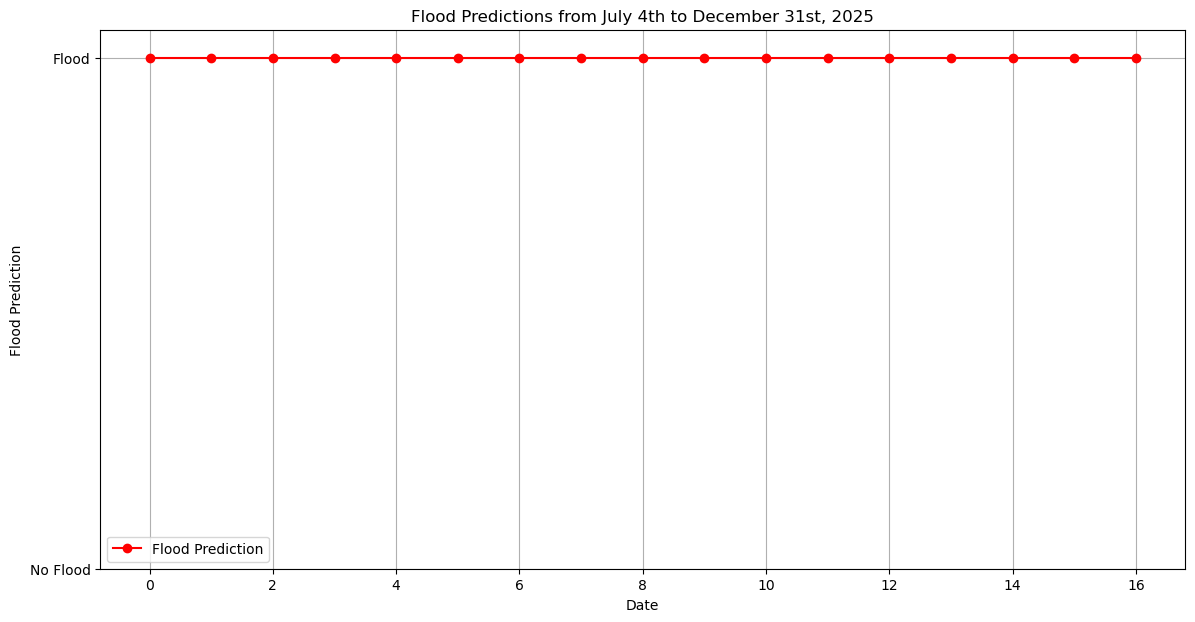

In [140]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(future_weather_data.index, future_weather_data['flood_prediction'], marker='o', linestyle='-', color='r', label='Flood Prediction')
plt.title('Flood Predictions from July 4th to December 31st, 2025')
plt.xlabel('Date')
plt.ylabel('Flood Prediction')
plt.yticks([0, 1], ['No Flood', 'Flood'])
plt.legend()
plt.grid(True)
plt.show()